In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("house_prices.csv")
print("----- Dataset Preview -----")
print(data.head())
print("\nDataset Info:")
print(data.info())

----- Dataset Preview -----
   Size  Bedrooms  Age   Price
0  2100         3   20  500000
1  1600         2   15  330000
2  2400         4    5  610000
3  1400         3   30  280000
4  3000         4    8  700000

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Size      51 non-null     int64
 1   Bedrooms  51 non-null     int64
 2   Age       51 non-null     int64
 3   Price     51 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB
None


In [9]:
X = data[['Size', 'Bedrooms', 'Age']]
y = data['Price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [17]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

In [19]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

In [21]:
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} -> MSE: {mse:.2f}, R2: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")

Linear Regression -> MSE: 815627213.67, R2: 0.94
Ridge Regression -> MSE: 887952997.40, R2: 0.94
Polynomial Regression -> MSE: 519243510.36, R2: 0.96


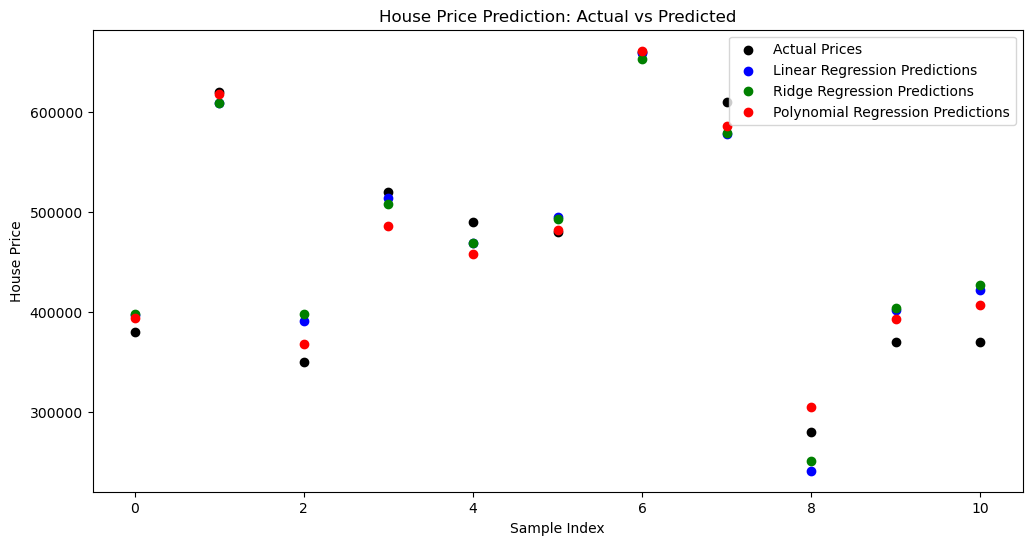

In [25]:
plt.figure(figsize=(12,6))

# Plot actual vs predicted
plt.scatter(range(len(y_test)), y_test, color='black', label='Actual Prices')
plt.scatter(range(len(y_test)), y_pred_lr, color='blue', label='Linear Regression Predictions')
plt.scatter(range(len(y_test)), y_pred_ridge, color='green', label='Ridge Regression Predictions')
plt.scatter(range(len(y_test)), y_pred_poly, color='red', label='Polynomial Regression Predictions')

plt.title("House Price Prediction: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.legend()
plt.show()